In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

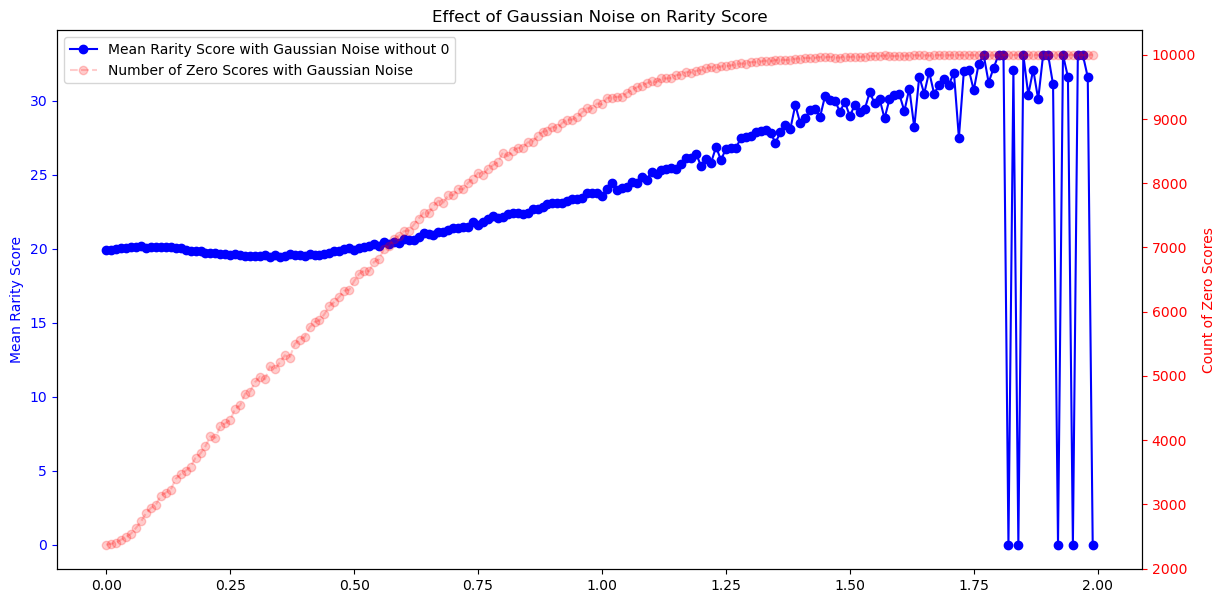

[19.94181108 19.93174061 19.9655849  20.01977619 20.04218992 20.12745357
 20.10944269 20.16491704 20.0566597  20.13840258 20.13168833 20.11953264
 20.08359591 20.12430185 20.0269492  20.05521687 19.9344689  19.85877414
 19.87237056 19.83963032 19.71822242 19.70183916 19.71595584 19.61553645
 19.66742411 19.54113429 19.65860152 19.56490456 19.50587627 19.48196294
 19.4814284  19.48480581 19.57840142 19.43429752 19.58188195 19.44418998
 19.47352128 19.64805129 19.58582837 19.57241014 19.5132918  19.66041675
 19.5534737  19.5802711  19.64532831 19.68952092 19.86253469 19.85254718
 19.96891482 20.04266972 19.92858856 20.05043222 20.1395573  20.21083653
 20.32087736 20.19829206 20.41737666 20.31701199 20.46166457 20.41129001
 20.67010322 20.61158886 20.60329722 20.77443819 21.04534272 20.99953188
 20.89604427 21.12115543 21.13220148 21.2905127  21.38931613 21.37526802
 21.45230411 21.45643245 21.78376898 21.56845739 21.81891549 22.01533991
 22.21850431 22.0890967  22.13361884 22.3340483  22

In [3]:
def plot_2axes(path):
    
    mean_scores_noise = []
    zero_scores_noise = []
    sigmas = []

    for filename in os.listdir(path):
        if filename.endswith("score.txt"):
            _, _, sigma, _ = filename.split('_')
            # sigma = sigma.removesuffix(".txt")
            sigmas.append(sigma)
            
            scores = np.loadtxt(os.path.join(path, filename))
            scores_non_zero = scores[scores != 0]
            mean_scores = np.mean(scores_non_zero) if scores_non_zero.size else 0
            mean_scores_noise.append(mean_scores)
            zero_scores_noise.append(np.sum(scores == 0))

    # sigmas to float for plotting
    sigmas_float = [float(s) for s in sigmas]

    # Sort results based on sigma values
    sorted_indices = np.argsort(sigmas_float)
    sigmas_sorted = np.array(sigmas_float)[sorted_indices]
    mean_scores_sorted = np.array(mean_scores_noise)[sorted_indices]
    zero_scores_sorted = np.array(zero_scores_noise)[sorted_indices]

    plt.figure(figsize=(14, 7))
    # Left y-axis will represent the mean score
    line1, = plt.plot(sigmas_sorted, mean_scores_sorted, color='b', marker='o', label='Mean Rarity Score with Gaussian Noise without 0')
    plt.ylabel('Mean Rarity Score', color='b')
    plt.tick_params('y', colors='b')

    # Second y-axis for the number of zeros
    ax2 = plt.twinx()
    line2, = ax2.plot(sigmas_sorted, zero_scores_sorted, color='r', marker='o', linestyle='--', label='Number of Zero Scores with Gaussian Noise', alpha=0.2)
    ax2.set_ylabel('Count of Zero Scores', color='r')
    ax2.tick_params('y', colors='r')

    plt.title('Effect of Gaussian Noise on Rarity Score')
    plt.xlabel('Sigma (Noise Level)')
    plt.xticks(rotation=45)

    # Combine legends of both the axes
    lines = [line1, line2]
    labels = [l.get_label() for l in lines]
    plt.legend(lines, labels, loc='upper left')

    # plt.tight_layout()
    plt.show()
    print(mean_scores_sorted)
    print(zero_scores_sorted)
    print(sigmas_sorted)
    

plot_2axes("./")